In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

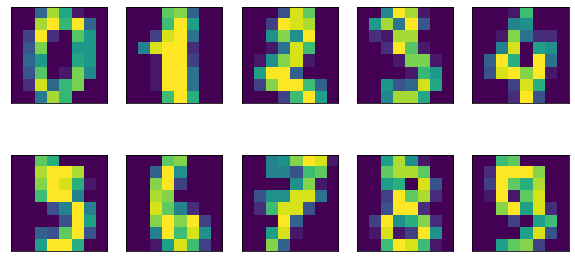

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'pca_component_2')

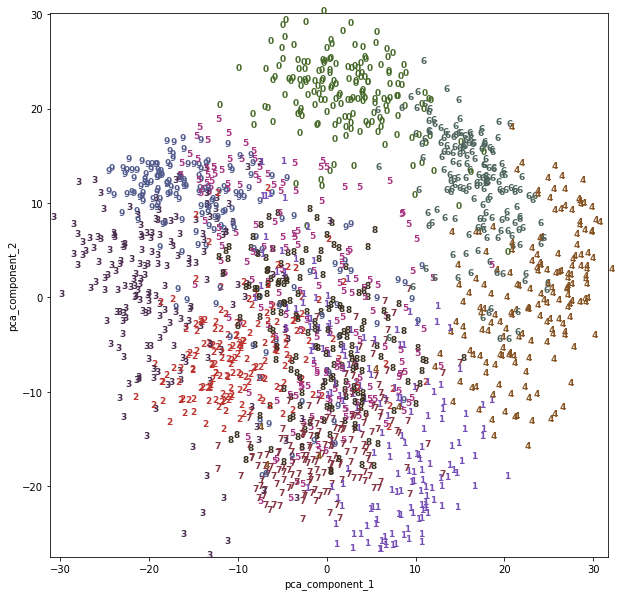

In [5]:
from sklearn.decomposition import PCA
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
# 새로 만들어진 축에 맞는 데이터가 나온다

colors = [
    "#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683",
    "#4E655E", "#853541", "#3A3120", "#535D8E"
]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
# 축이 어디서 부터 어디까지. 정의를 해줌
#1797번 반복
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다 #str은 실제 텍스트 넣을 수 있는 공간
    plt.text(
        digits_pca[i, 0],
        digits_pca[i, 1],
        str(digits.target[i]),
        color=colors[digits.target[i]],  #실제 표현 되는 부분
        fontdict={
            'weight': 'bold',
            'size': 9
        })
plt.xlabel("pca_component_1")
plt.ylabel("pca_component_2")

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE Feature 1')

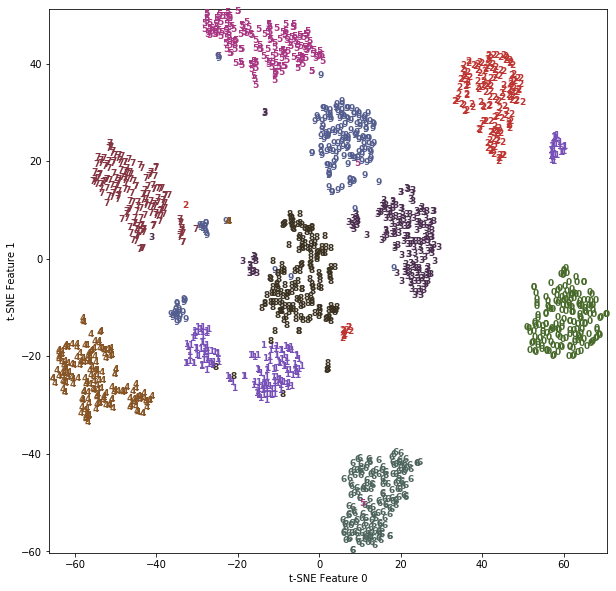

In [8]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    #     숫자를 str으로 바꿔서 찍어준다
    plt.text(digits_tsne[i, 0],
             digits_tsne[i, 1],
             str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={
                 'weight': 'bold',
                 'size': 9
             })
plt.xlabel("t-SNE Feature 0")
plt.ylabel("t-SNE Feature 1")